In [1]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

#model 1 menggunakan Multilayer Neural Network

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [4]:

model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3910 - acc: 0.8912 - val_loss: 0.2218 - val_acc: 0.9359
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1959 - acc: 0.9451 - val_loss: 0.1652 - val_acc: 0.9526
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1460 - acc: 0.9583 - val_loss: 0.1332 - val_acc: 0.9620
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1175 - acc: 0.9657 - val_loss: 0.1212 - val_acc: 0.9637
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0989 - acc: 0.9716 - val_loss: 0.1098 - val_acc: 0.9668
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0840 - acc: 0.9757 - val_loss: 0.0967 - val_acc: 0.9706
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0743 - acc: 0.9788 - val_loss: 0.0949 - val_acc: 0.9719
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 0.

In [5]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (100, 784)                0         
_________________________________________________________________
dense (Dense)                (100, 64)                 50240     
_________________________________________________________________
dense_1 (Dense)              (100, 10)                 650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0839 - acc: 0.9761


[0.08388985693454742, 0.9761000275611877]

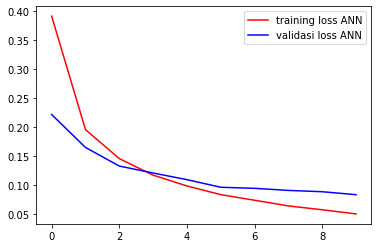

In [9]:
import matplotlib.pyplot as plt

epochs = range(10)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

In [8]:
import numpy as np

pred = model1.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

label actual: 3
label prediction: 3


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#model2 menggunakan Convolutional Neural Network

model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(2,2))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [11]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [12]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

history2 = model2.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 14s 23ms/step - loss: 0.2418 - acc: 0.9264 - val_loss: 0.0683 - val_acc: 0.9795
Epoch 2/10
600/600 [==============================] - 14s 24ms/step - loss: 0.0666 - acc: 0.9795 - val_loss: 0.0499 - val_acc: 0.9836
Epoch 3/10
600/600 [==============================] - 23s 38ms/step - loss: 0.0470 - acc: 0.9852 - val_loss: 0.0441 - val_acc: 0.9843
Epoch 4/10
600/600 [==============================] - 16s 26ms/step - loss: 0.0351 - acc: 0.9891 - val_loss: 0.0457 - val_acc: 0.9846
Epoch 5/10
600/600 [==============================] - 18s 29ms/step - loss: 0.0298 - acc: 0.9909 - val_loss: 0.0366 - val_acc: 0.9888
Epoch 6/10
600/600 [==============================] - 19s 31ms/step - loss: 0.0238 - acc: 0.9929 - val_loss: 0.0347 - val_acc: 0.9898
Epoch 7/10
600/600 [==============================] - 19s 32ms/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0284 - val_acc: 0.9897
Epoch 8/10
600/600 [==============================] - 18s 30ms

In [13]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0304 - acc: 0.9897


[0.03035075031220913, 0.9897000193595886]

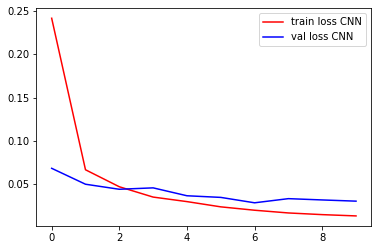

In [14]:
import matplotlib.pyplot as plt

epochs = range(10)

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.plot(epochs,loss2,'r',label='train loss CNN')
plt.plot(epochs,val_loss2,'b',label='val loss CNN')
plt.legend()

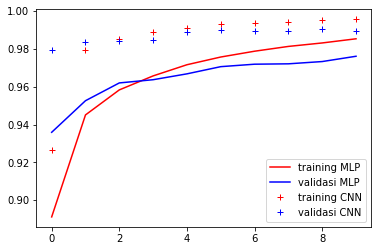

In [15]:
import matplotlib.pyplot as plt

epochs = range(10)

acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs,acc1,'r',label='training MLP')
plt.plot(epochs,val_acc1,'b',label='validasi MLP')

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']

plt.plot(epochs,acc2,'r+',label='training CNN')
plt.plot(epochs,val_acc2,'b+',label='validasi CNN')
plt.legend()

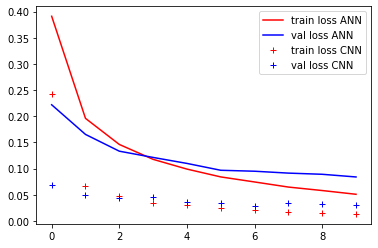

In [16]:
import matplotlib.pyplot as plt

epochs = range(10)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='train loss ANN')
plt.plot(epochs,val_loss1,'b',label='val loss ANN')

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.plot(epochs,loss2,'r+',label='train loss CNN')
plt.plot(epochs,val_loss2,'b+',label='val loss CNN')
plt.legend()

In [17]:
import numpy as np

pred = model2.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

label actual: 3
label prediction: 3


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#model 3 Convolutional Neural Network dengan Dropout

model3 = Sequential()
model3.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model3.add(MaxPooling2D(2,2))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10,activation='softmax'))

In [19]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                100416    
_________________________________________________________________
dropout (Dropout)            (None, 64)               

In [20]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

history3 = model3.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 14s 23ms/step - loss: 0.3895 - acc: 0.8805 - val_loss: 0.0716 - val_acc: 0.9766
Epoch 2/10
600/600 [==============================] - 14s 23ms/step - loss: 0.1458 - acc: 0.9571 - val_loss: 0.0561 - val_acc: 0.9825
Epoch 3/10
600/600 [==============================] - 31s 52ms/step - loss: 0.1071 - acc: 0.9679 - val_loss: 0.0472 - val_acc: 0.9848
Epoch 4/10
600/600 [==============================] - 16s 27ms/step - loss: 0.0894 - acc: 0.9740 - val_loss: 0.0380 - val_acc: 0.9867
Epoch 5/10
600/600 [==============================] - 20s 33ms/step - loss: 0.0787 - acc: 0.9767 - val_loss: 0.0359 - val_acc: 0.9895
Epoch 6/10
600/600 [==============================] - 20s 33ms/step - loss: 0.0673 - acc: 0.9798 - val_loss: 0.0300 - val_acc: 0.9901
Epoch 7/10
600/600 [==============================] - 19s 32ms/step - loss: 0.0644 - acc: 0.9809 - val_loss: 0.0307 - val_acc: 0.9885
Epoch 8/10
600/600 [==============================] - 20s 34ms

In [21]:
model3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0285 - acc: 0.9901


[0.028538506478071213, 0.9901000261306763]

In [22]:
pred = model3.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

label actual: 3
label prediction: 3


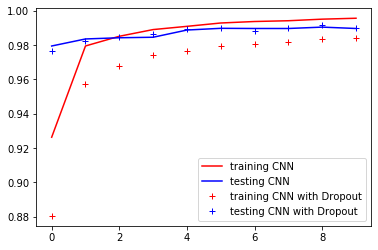

In [23]:
import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']

epochs = range(10)

plt.plot(epochs,acc2,'r',label='training CNN')
plt.plot(epochs,val_acc2,'b',label='testing CNN')

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']

plt.plot(epochs,acc3,'r+',label='training CNN with Dropout')
plt.plot(epochs,val_acc3,'b+',label='testing CNN with Dropout')
plt.legend()

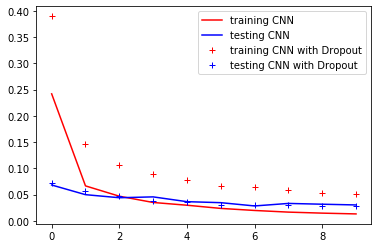

In [24]:
import matplotlib.pyplot as plt

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(10)

plt.plot(epochs,loss2,'r',label='training CNN')
plt.plot(epochs,val_loss2,'b',label='testing CNN')

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

plt.plot(epochs,loss3,'r+',label='training CNN with Dropout')
plt.plot(epochs,val_loss3,'b+',label='testing CNN with Dropout')
plt.legend()

In [131]:
# Network Parameters
# MNIST image shape is 28*28px, we will then handle 28 sequences of 28 timesteps for every sample.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).
num_input = 28 # number of sequences.
timesteps = 28 # timesteps.

x_train, x_test = X_train.reshape([-1, 28, 28]), X_test.reshape([-1, num_features])